In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip -u "/content/drive/MyDrive/datasets.zip" -d "/content/drive/MyDrive/nutrition_data"

Archive:  /content/drive/MyDrive/datasets.zip
   creating: /content/drive/MyDrive/nutrition_data/datasets/test/
   creating: /content/drive/MyDrive/nutrition_data/datasets/test/0/
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/istockphoto-1124393111-612x612.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/istockphoto-1191780252-612x612.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/istockphoto-1200104686-612x612.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/istockphoto-1204114212-612x612.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/istockphoto-1321316465-612x612.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/lantana-pink-scoop-neck-half-sleeve-women-tshirt-bamboo-viscose-1.jpg  
  inflating: /content/drive/MyDrive/nutrition_data/datasets/test/0/mnr-tshirt-0003-s_1.jpg  
   creating: /content/drive/MyDrive/nutrition_data/datasets/test/1/


In [ ]:
import Augmentor
p = Augmentor.Pipeline("/content/drive/MyDrive/malnutrition_data/datasets/train")

Initialised with 94 image(s) found.
Output directory set to /content/drive/MyDrive/malnutrition_data/datasets/train/output.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.flip_left_right(probability=0.8)
p.flip_top_bottom(probability=0.3)
p.resize(probability=1.0, width=120, height=120)

In [ ]:
p.sample(4000)

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x7F34F287D1F0>: 100%|██████████| 4000/4000 [01:27<00:00, 45.67 Samples/s]


Custom CNN

In [ ]:
import numpy as np
import keras
import keras.backend as k
import tensorflow as tf
from keras.layers import Conv2D
from keras.layers import SpatialDropout2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.preprocessing import image
import cv2
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.models import Sequential
from keras import backend as K
if K.image_data_format() == "channels_first":
    input_shape = (3, 224, 224)
else:
    input_shape = (224, 224, 3)

#Creating a model
model_dl = keras.Sequential()
model_dl.add(Conv2D(16,(3,3),activation="relu",input_shape=(input_shape)))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))

model_dl.add(Conv2D(32,(3,3),activation="relu"))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))

model_dl.add(Conv2D(64,(3,3),activation="relu"))
model_dl.add(MaxPool2D(2,2))
model_dl.add(Dropout(0.2))

model_dl.add(Flatten())
model_dl.add(Dense(128,activation="relu"))
model_dl.add(Dropout(0.2))
model_dl.add(Dense(4,activation="softmax"))

In [ ]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
ds_asl_dir = "/content/drive/MyDrive/malnutrition_data/datasets/train/output"

# #Augmenting the images

from keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(rotation_range=15, rescale=1/255, zoom_range=0.1, horizontal_flip=True,
                                       width_shift_range=0.1, height_shift_range=0.1, validation_split=0.2)

#Setting train/test split

asl_train_ds = data_augmentation.flow_from_directory(directory=ds_asl_dir, target_size=(img_height, img_width),
                                                     class_mode="categorical", batch_size=batch_size, subset="training")
asl_test_ds = data_augmentation.flow_from_directory(directory=ds_asl_dir, target_size=(img_height, img_width),
                                                    class_mode="categorical", batch_size=batch_size, subset="validation")

Found 3202 images belonging to 4 classes.
Found 798 images belonging to 4 classes.


In [ ]:
#Compiling the neural network

model_dl.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Fitting to the model

from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10) 
learning_rate_reduce=ReduceLROnPlateau(monitor="val_accuracy",min_lr=0.001) 
callbacks=[earlystop,learning_rate_reduce]

history = model_dl.fit(asl_train_ds, validation_data=asl_test_ds, epochs=10)

Epoch 1/10
101/101 [==============================] - 1114s 11s/step - loss: 1.2695 - accuracy: 0.4631 - val_loss: 2.1593 - val_accuracy: 0.4574
Epoch 2/10
101/101 [==============================] - 53s 520ms/step - loss: 0.7810 - accuracy: 0.6665 - val_loss: 3.0313 - val_accuracy: 0.4348
Epoch 3/10
101/101 [==============================] - 52s 516ms/step - loss: 0.5570 - accuracy: 0.7695 - val_loss: 4.1052 - val_accuracy: 0.5276
Epoch 4/10
101/101 [==============================] - 53s 527ms/step - loss: 0.4090 - accuracy: 0.8401 - val_loss: 6.7961 - val_accuracy: 0.5326
Epoch 5/10
101/101 [==============================] - 52s 513ms/step - loss: 0.3243 - accuracy: 0.8748 - val_loss: 8.0770 - val_accuracy: 0.4048
Epoch 6/10
101/101 [==============================] - 52s 513ms/step - loss: 0.2437 - accuracy: 0.9079 - val_loss: 6.9885 - val_accuracy: 0.6003
Epoch 7/10
101/101 [==============================] - 54s 533ms/step - loss: 0.2978 - accuracy: 0.8810 - val_loss: 10.5608 - val_a

In [ ]:
#Compiling the neural network

model_dl.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Fitting to the model

from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10) 
learning_rate_reduce=ReduceLROnPlateau(monitor="val_accuracy",min_lr=0.001) 
callbacks=[earlystop,learning_rate_reduce]

history = model_dl.fit(asl_train_ds, validation_data=asl_test_ds, epochs=10)

Epoch 1/10
101/101 [==============================] - 51s 502ms/step - loss: 1.5157 - accuracy: 0.4019 - val_loss: 1.4223 - val_accuracy: 0.2581
Epoch 2/10
101/101 [==============================] - 49s 485ms/step - loss: 0.8211 - accuracy: 0.6502 - val_loss: 1.7350 - val_accuracy: 0.3822
Epoch 3/10
101/101 [==============================] - 49s 490ms/step - loss: 0.6396 - accuracy: 0.7352 - val_loss: 1.9191 - val_accuracy: 0.4561
Epoch 4/10
101/101 [==============================] - 49s 487ms/step - loss: 0.4702 - accuracy: 0.8101 - val_loss: 2.7588 - val_accuracy: 0.4699
Epoch 5/10
101/101 [==============================] - 49s 481ms/step - loss: 0.3978 - accuracy: 0.8454 - val_loss: 4.2284 - val_accuracy: 0.4499
Epoch 6/10
101/101 [==============================] - 50s 493ms/step - loss: 0.3170 - accuracy: 0.8763 - val_loss: 5.6434 - val_accuracy: 0.4599
Epoch 7/10
101/101 [==============================] - 49s 484ms/step - loss: 0.2508 - accuracy: 0.9022 - val_loss: 7.5151 - val_ac

In [ ]:
# Saving the model
model_dl.save('CNN_model.h5')

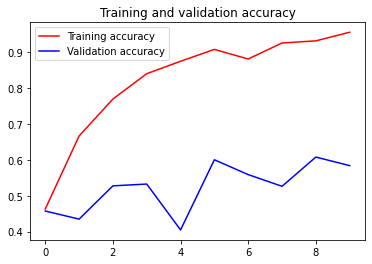

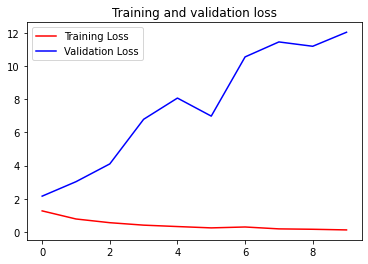

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

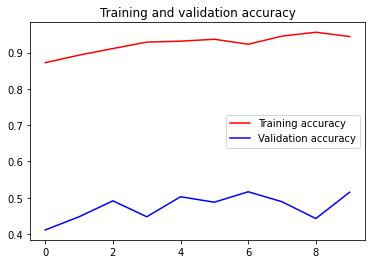

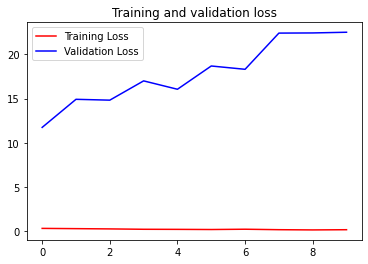

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model_dl.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'obesity', 'stunning','wasting']
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-44-36a60fa5dee1>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_dl.predict_generator(val_ds, 1600)


Confusion Matrix
[[204  20  11   0]
 [109  79  26   0]
 [ 35   8  94  12]
 [127  36   9  30]]
Classification Report
              precision    recall  f1-score   support

      normal       0.43      0.87      0.57       235
     obesity       0.55      0.37      0.44       214
    stunning       0.67      0.63      0.65       149
     wasting       0.71      0.15      0.25       202

    accuracy                           0.51       800
   macro avg       0.59      0.50      0.48       800
weighted avg       0.58      0.51      0.47       800



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model_dl.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'obesity', 'stunning','wasting']
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-18-36a60fa5dee1>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_dl.predict_generator(val_ds, 1600)


Confusion Matrix
[[221   2  12   0]
 [163  28  23   0]
 [ 25   5 119   0]
 [121  21  30  30]]
Classification Report
              precision    recall  f1-score   support

      normal       0.42      0.94      0.58       235
     obesity       0.50      0.13      0.21       214
    stunning       0.65      0.80      0.71       149
     wasting       1.00      0.15      0.26       202

    accuracy                           0.50       800
   macro avg       0.64      0.50      0.44       800
weighted avg       0.63      0.50      0.42       800



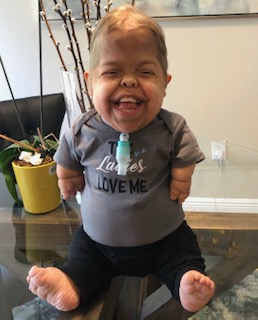

1/1 [==============================] - 0s 192ms/step
stunting
The predicted image corresponds to "2"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/TBMB-MAY-2019-Pic-1.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/TBMB-MAY-2019-Pic-1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')



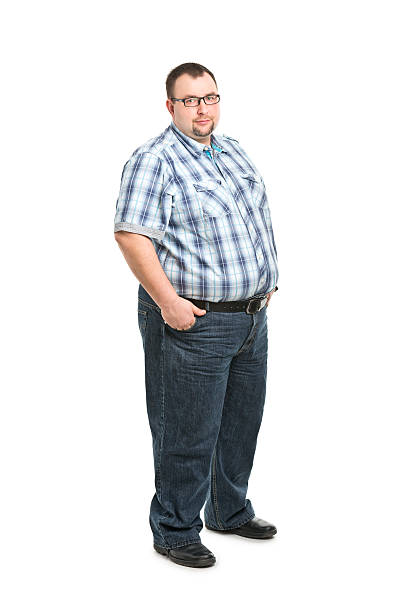

1/1 [==============================] - 0s 68ms/step
normal
The predicted image corresponds to "0"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/istockphoto-466038647-612x612.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/istockphoto-466038647-612x612.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')



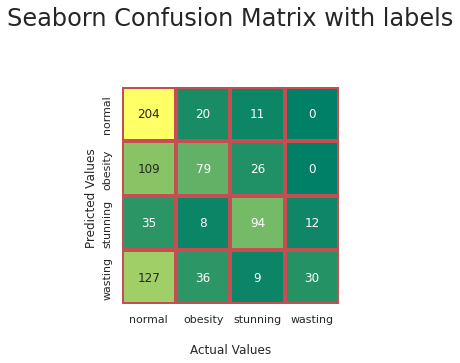

In [ ]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm, annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=target_names,yticklabels=target_names,fmt='')
#sns.heatmap(cm, annot=True,annot_kws={"size": 22})
sns.set(font_scale = 2.0)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

In [ ]:
import pathlib
import tensorflow as tf
data_dir = pathlib.Path("/content/drive/MyDrive/malnutrition_data/datasets/train/output")


In [ ]:
img_height=224
img_width=224

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),batch_size=32)


Found 4000 files belonging to 4 classes.
Using 3200 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),batch_size=32)


Found 4000 files belonging to 4 classes.
Using 800 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 0.99267584


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


InceptionV3 model

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model1 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions1 = Dense(4, activation='softmax')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/home/user/datasets/samples/"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
history1=model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3)

model1.save('InceptionV3_model.h5')

Epoch 1/3


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 1056s 9s/step - loss: 0.5168 - accuracy: 0.8253 - val_loss: 5.5113 - val_accuracy: 0.2975
Epoch 2/3
100/100 [==============================] - 895s 9s/step - loss: 0.2015 - accuracy: 0.9425 - val_loss: 41.3779 - val_accuracy: 0.3613
Epoch 3/3
100/100 [==============================] - 880s 9s/step - loss: 0.0981 - accuracy: 0.9734 - val_loss: 2.1575 - val_accuracy: 0.5400


In [ ]:
history1=model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3)

model1.save('InceptionV3_model.h5')

Epoch 1/3


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 29s 227ms/step - loss: 0.4970 - accuracy: 0.8313 - val_loss: 4.6789 - val_accuracy: 0.3137
Epoch 2/3
100/100 [==============================] - 22s 218ms/step - loss: 0.1791 - accuracy: 0.9453 - val_loss: 1.4271 - val_accuracy: 0.6275
Epoch 3/3
100/100 [==============================] - 22s 219ms/step - loss: 0.0825 - accuracy: 0.9737 - val_loss: 1.2854 - val_accuracy: 0.8100


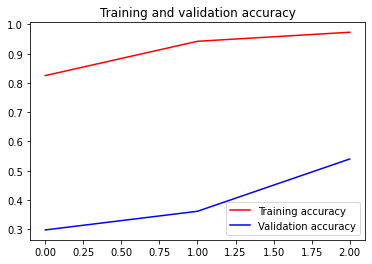

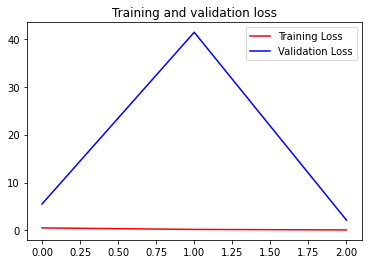

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model_dl.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'obesity', 'stunning','wasting']
print(classification_report(test_label, y_pred, target_names=target_names))



<ipython-input-55-1319b2c5e69d>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_dl.predict_generator(val_ds, 1600)


Confusion Matrix
[[204  20  11   0]
 [109  79  26   0]
 [ 35   8  94  12]
 [127  36   9  30]]
Classification Report
              precision    recall  f1-score   support

      normal       0.43      0.87      0.57       235
     obesity       0.55      0.37      0.44       214
    stunning       0.67      0.63      0.65       149
     wasting       0.71      0.15      0.25       202

    accuracy                           0.51       800
   macro avg       0.59      0.50      0.48       800
weighted avg       0.58      0.51      0.47       800



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model1.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'obesity', 'stunning','wasting']
print(classification_report(test_label, y_pred, target_names=target_names))



<ipython-input-16-0b9638e22f5e>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model1.predict_generator(val_ds, 1600)


Confusion Matrix


NameError: ignored

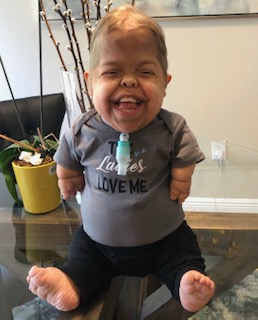

1/1 [==============================] - 0s 158ms/step
stunting
The predicted image corresponds to "2"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/TBMB-MAY-2019-Pic-1.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/TBMB-MAY-2019-Pic-1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model2 = VGG16(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions2 = Dense(4, activation='softmax')(x)
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history2=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model2.save('VGG16_model.h5')

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 31s 263ms/step - loss: 5.1455 - accuracy: 0.2978 - val_loss: 1.3738 - val_accuracy: 0.2937
Epoch 2/15
100/100 [==============================] - 26s 258ms/step - loss: 1.2341 - accuracy: 0.4381 - val_loss: 1.1136 - val_accuracy: 0.4725
Epoch 3/15
100/100 [==============================] - 26s 256ms/step - loss: 1.0769 - accuracy: 0.4800 - val_loss: 1.0549 - val_accuracy: 0.4775
Epoch 4/15
100/100 [==============================] - 26s 259ms/step - loss: 1.6037 - accuracy: 0.4341 - val_loss: 1.5350 - val_accuracy: 0.2675
Epoch 5/15
100/100 [==============================] - 26s 259ms/step - loss: 1.6459 - accuracy: 0.3066 - val_loss: 1.3791 - val_accuracy: 0.2937
Epoch 6/15
100/100 [==============================] - 26s 258ms/step - loss: 1.3617 - accuracy: 0.3075 - val_loss: 1.3769 - val_accuracy: 0.2937
Epoch 7/15
100/100 [==============================] - 26s 256ms/step - loss: 1.3607 - accuracy: 0.3075 - val_loss: 1.3765 - val_accuracy: 0.2

In [ ]:
history2=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5)

model2.save('VGG16_model.h5')

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 2384s 24s/step - loss: 3.6171 - accuracy: 0.2969 - val_loss: 1.3736 - val_accuracy: 0.2937
Epoch 2/5
 78/100 [======================>.......] - ETA: 7:40 - loss: 1.3610 - accuracy: 0.3117

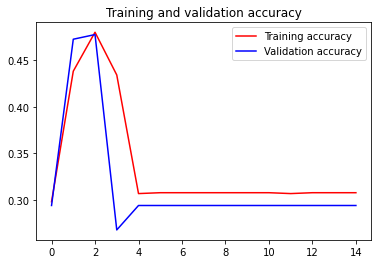

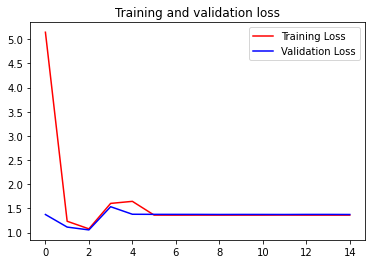

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model_dl.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['normal', 'obesity', 'stunning','wasting']
print(classification_report(test_label, y_pred, target_names=target_names))



<ipython-input-60-1319b2c5e69d>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_dl.predict_generator(val_ds, 1600)


Confusion Matrix
[[204  20  11   0]
 [109  79  26   0]
 [ 35   8  94  12]
 [127  36   9  30]]
Classification Report
              precision    recall  f1-score   support

      normal       0.43      0.87      0.57       235
     obesity       0.55      0.37      0.44       214
    stunning       0.67      0.63      0.65       149
     wasting       0.71      0.15      0.25       202

    accuracy                           0.51       800
   macro avg       0.59      0.50      0.48       800
weighted avg       0.58      0.51      0.47       800



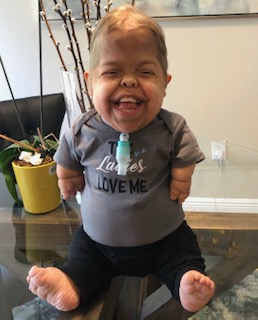

1/1 [==============================] - 0s 67ms/step
stunting
The predicted image corresponds to "2"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/CNN_model.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/TBMB-MAY-2019-Pic-1.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/TBMB-MAY-2019-Pic-1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')



In [ ]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in val_ds], axis=0) 
print(test_label.shape)

(3200,)
(800,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

img_width=224; img_height=224
batch_size=8

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model

best_model3 = ModelCheckpoint("imagenet", monitor='val_acc', verbose = 1, save_best_only = True)

vgg19_base = VGG19(include_top=False, weights='imagenet',
                   input_tensor=None, input_shape=(img_height, img_width, 3))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
# Freeze the first 10 layers
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
for layer in vgg19_base.layers[:10]:
    layer.trainable = False
x = vgg19_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions3 = Dense(4, activation='softmax')(x)
model3= Model(inputs=vgg19_base.inputs, outputs=predictions3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history3=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model3.save('VGG19_model.h5')

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 32s 311ms/step - loss: 10.8223 - accuracy: 0.3003 - val_loss: 1.3740 - val_accuracy: 0.2937
Epoch 2/15
100/100 [==============================] - 31s 314ms/step - loss: 1.3632 - accuracy: 0.3063 - val_loss: 1.3735 - val_accuracy: 0.2675
Epoch 3/15
100/100 [==============================] - 32s 315ms/step - loss: 1.3680 - accuracy: 0.3050 - val_loss: 1.3742 - val_accuracy: 0.2975
Epoch 4/15
100/100 [==============================] - 32s 317ms/step - loss: 1.9666 - accuracy: 0.3047 - val_loss: 1.3780 - val_accuracy: 0.2675
Epoch 5/15
100/100 [==============================] - 32s 320ms/step - loss: 1.3614 - accuracy: 0.3003 - val_loss: 1.3760 - val_accuracy: 0.2937
Epoch 6/15
100/100 [==============================] - 32s 321ms/step - loss: 1.3609 - accuracy: 0.3041 - val_loss: 1.3767 - val_accuracy: 0.2937
Epoch 7/15
100/100 [==============================] - 32s 322ms/step - loss: 1.3611 - accuracy: 0.3078 - val_loss: 1.3767 - val_accuracy: 0.

In [ ]:
history3=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model3.save('VGG19_model.h5')

Epoch 1/15
100/100 [==============================] - 35s 337ms/step - loss: 4.7316 - accuracy: 0.2950 - val_loss: 1.3688 - val_accuracy: 0.3950
Epoch 2/15
100/100 [==============================] - 33s 333ms/step - loss: 1.3801 - accuracy: 0.3288 - val_loss: 1.3644 - val_accuracy: 0.3713
Epoch 3/15
100/100 [==============================] - 33s 332ms/step - loss: 1.2664 - accuracy: 0.4175 - val_loss: 1.1076 - val_accuracy: 0.4112
Epoch 4/15
100/100 [==============================] - 33s 334ms/step - loss: 1.0549 - accuracy: 0.5088 - val_loss: 0.9379 - val_accuracy: 0.5663
Epoch 5/15
100/100 [==============================] - 34s 336ms/step - loss: 0.8911 - accuracy: 0.5944 - val_loss: 0.7722 - val_accuracy: 0.6525
Epoch 6/15
100/100 [==============================] - 33s 335ms/step - loss: 0.7380 - accuracy: 0.6678 - val_loss: 0.7936 - val_accuracy: 0.6550
Epoch 7/15
100/100 [==============================] - 34s 336ms/step - loss: 0.7337 - accuracy: 0.6666 - val_loss: 0.6316 - val_ac

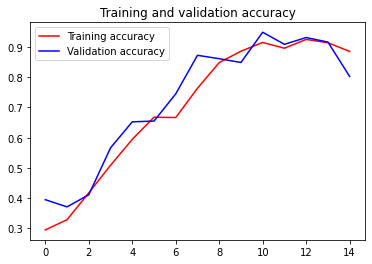

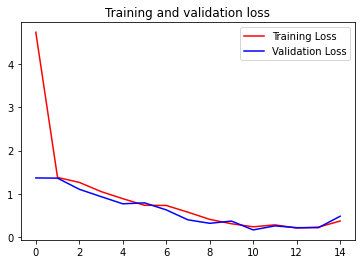

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/InceptionV3_model.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/VGG16_model.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
model_3 = load_model("/content/VGG19_model.h5")
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')
                
model_4 = load_model("/content/CNN_model.h5")
model_4= Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')

In [ ]:
models = [model_1, model_2,model_3,model_4]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
import tensorflow as tf
ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/home/user/datasets/samples/"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [ ]:
history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

Epoch 1/15
100/100 [==============================] - 87s 727ms/step - loss: 0.9401 - accuracy: 0.4359 - val_loss: 1.5942 - val_accuracy: 0.2937
Epoch 2/15
100/100 [==============================] - 73s 731ms/step - loss: 0.8988 - accuracy: 0.6831 - val_loss: 1.2502 - val_accuracy: 0.5437
Epoch 3/15
100/100 [==============================] - 74s 736ms/step - loss: 0.9599 - accuracy: 0.7713 - val_loss: 1.4205 - val_accuracy: 0.2788
Epoch 4/15
100/100 [==============================] - 74s 739ms/step - loss: 0.8758 - accuracy: 0.9159 - val_loss: 1.4375 - val_accuracy: 0.2125
Epoch 5/15
100/100 [==============================] - 75s 748ms/step - loss: 0.8502 - accuracy: 0.9472 - val_loss: 1.0617 - val_accuracy: 0.7663
Epoch 6/15
100/100 [==============================] - 75s 747ms/step - loss: 0.8485 - accuracy: 0.9400 - val_loss: 1.0361 - val_accuracy: 0.7163
Epoch 7/15
100/100 [==============================] - 75s 748ms/step - loss: 0.8392 - accuracy: 0.9531 - val_loss: 1.2436 - val_ac

In [ ]:
history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

Epoch 1/15
100/100 [==============================] - 94s 788ms/step - loss: 0.7402 - accuracy: 0.8134 - val_loss: 1.3163 - val_accuracy: 0.3988
Epoch 2/15
100/100 [==============================] - 76s 766ms/step - loss: 0.9052 - accuracy: 0.7059 - val_loss: 1.4749 - val_accuracy: 0.3787
Epoch 3/15
100/100 [==============================] - 76s 763ms/step - loss: 0.9496 - accuracy: 0.7688 - val_loss: 1.4323 - val_accuracy: 0.2713
Epoch 4/15
100/100 [==============================] - 76s 763ms/step - loss: 0.8924 - accuracy: 0.8797 - val_loss: 1.0290 - val_accuracy: 0.6737
Epoch 5/15
100/100 [==============================] - 76s 762ms/step - loss: 0.9753 - accuracy: 0.7334 - val_loss: 1.2737 - val_accuracy: 0.4387
Epoch 6/15
100/100 [==============================] - 76s 762ms/step - loss: 0.9875 - accuracy: 0.7509 - val_loss: 1.3725 - val_accuracy: 0.3100
Epoch 7/15
100/100 [==============================] - 76s 764ms/step - loss: 0.9371 - accuracy: 0.8909 - val_loss: 1.0717 - val_ac

In [ ]:
models = [model_2,model_3,model_4]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

import tensorflow as tf
ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5)

Epoch 1/5
100/100 [==============================] - 59s 569ms/step - loss: 1.3819 - accuracy: 0.3075 - val_loss: 1.3911 - val_accuracy: 0.2937
Epoch 2/5
100/100 [==============================] - 58s 579ms/step - loss: 1.3677 - accuracy: 0.3075 - val_loss: 1.3848 - val_accuracy: 0.2937
Epoch 3/5
 26/100 [======>.......................] - ETA: 37s - loss: 1.3597 - accuracy: 0.3065

KeyboardInterrupt: ignored

In [ ]:
ensemble_model.save('ensemble.h5')

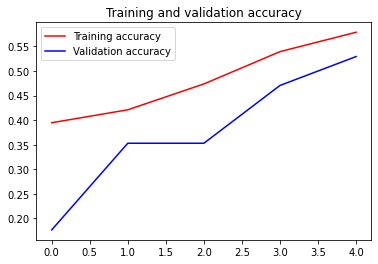

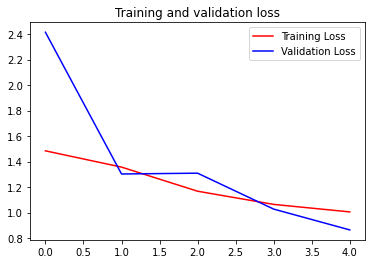

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

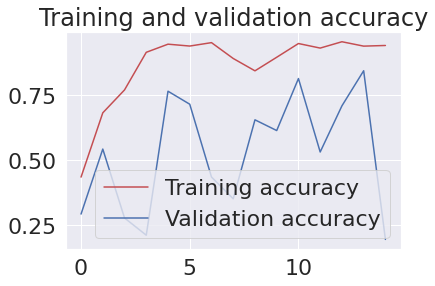

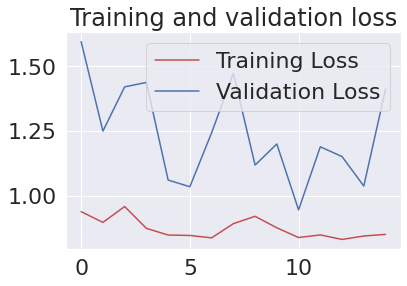

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

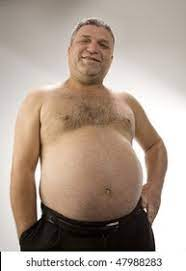

1/1 [==============================] - 0s 206ms/step
obesity
The predicted image corresponds to "1"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/ensemble.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/drive/MyDrive/nutrition_data/images (3).jpg", target_size=(224, 224))
img1 = cv2.imread('/content/drive/MyDrive/nutrition_data/images (3).jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')



In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/nutrition_data/models/ensemble.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model1.tflite", "wb").write(tflite_model)

22252048

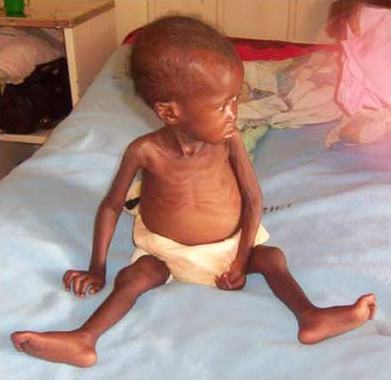

1/1 [==============================] - 0s 215ms/step
wasting
The predicted image corresponds to "3"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"normal",1:"obesity",2:"stunting",3:"wasting"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/nutrition_data/models/ensemble.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/drive/MyDrive/nutrition_data/Malnourished_child.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/drive/MyDrive/nutrition_data/Malnourished_child.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("normal")
elif result[0][1] == 1:
    prediction = '1'
    print("obesity")
elif result[0][2] == 1:
    prediction = '2'
    print("stunting")
elif result[0][3] == 1:
    prediction = '3'
    print("wasting")
else:
    prediction = "XXXXXXXX"

print(f'The predicted image corresponds to "{prediction}"')

